In [1]:
import os, sys, inspect

cmd_folder = os.path.realpath(
    os.path.dirname(
        os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0])))

if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
    
from transitions.extensions import MachineFactory
from IPython.display import Image, display, display_png

class Matter(object):
    def is_hot(self):
        return True
    def is_too_hot(self):
        return False

def show_graph(self):
    self.graph.draw('state.png', prog='dot')
    self.graph.draw('state.dot', prog='dot')
    display(Image('state.png'))     

GraphMachine = MachineFactory.get_predefined(graph=True, nested=True)
GraphMachine.show_graph = show_graph

   

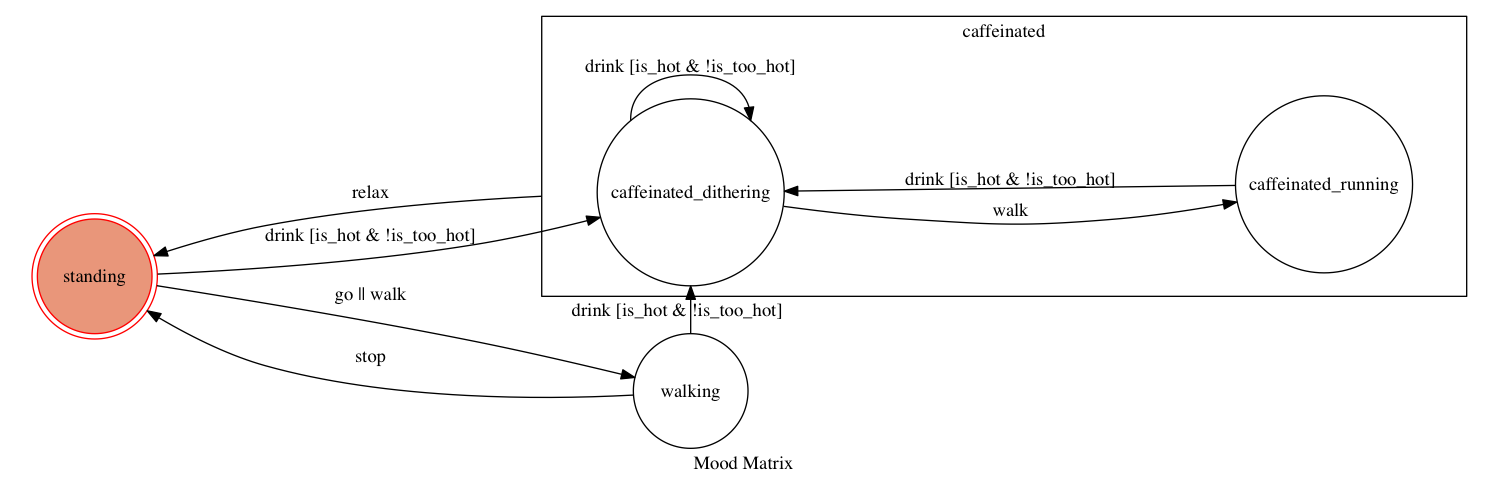

In [2]:
states = ['standing', 'walking', {'name': 'caffeinated', 'children':['dithering', 'running']}]
transitions = [
  ['walk', 'standing', 'walking'],
  ['go', 'standing', 'walking'],
  ['stop', 'walking', 'standing'],
  {'trigger': 'drink', 'source': '*', 'dest': 'caffeinated_dithering',
   'conditions':'is_hot', 'unless': 'is_too_hot'},
  ['walk', 'caffeinated_dithering', 'caffeinated_running'],
  ['relax', 'caffeinated', 'standing']
]

machine = GraphMachine(model=Matter(), 
                       states=states, 
                       transitions=transitions, 
                       auto_transitions=False, 
                       initial='standing', 
                       title="Mood Matrix",
                       show_conditions=True)
machine.show_graph()

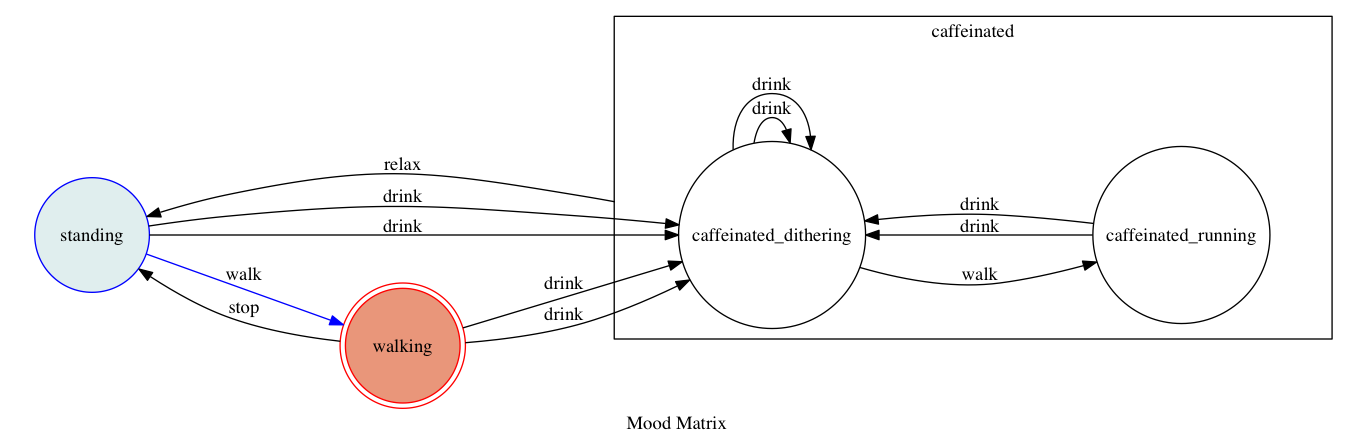

In [6]:
machine.model.walk()
machine.show_graph()

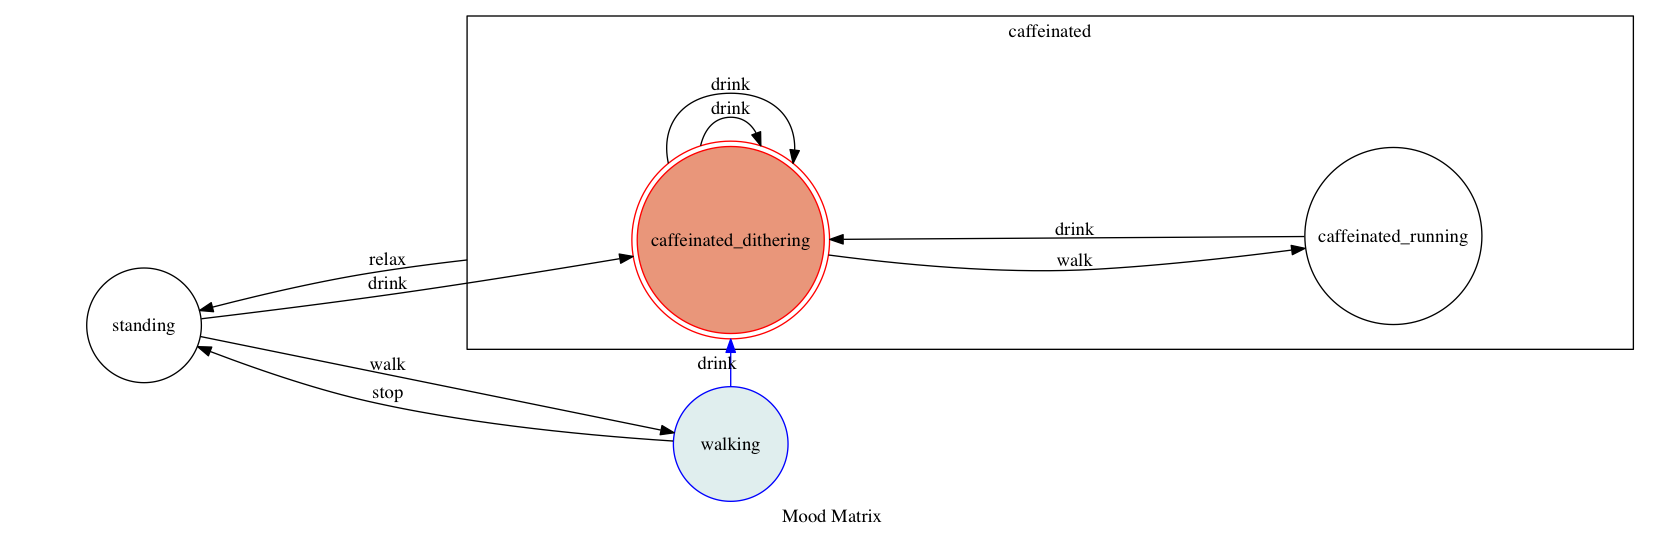

In [7]:
machine.model.drink()
machine.show_graph()

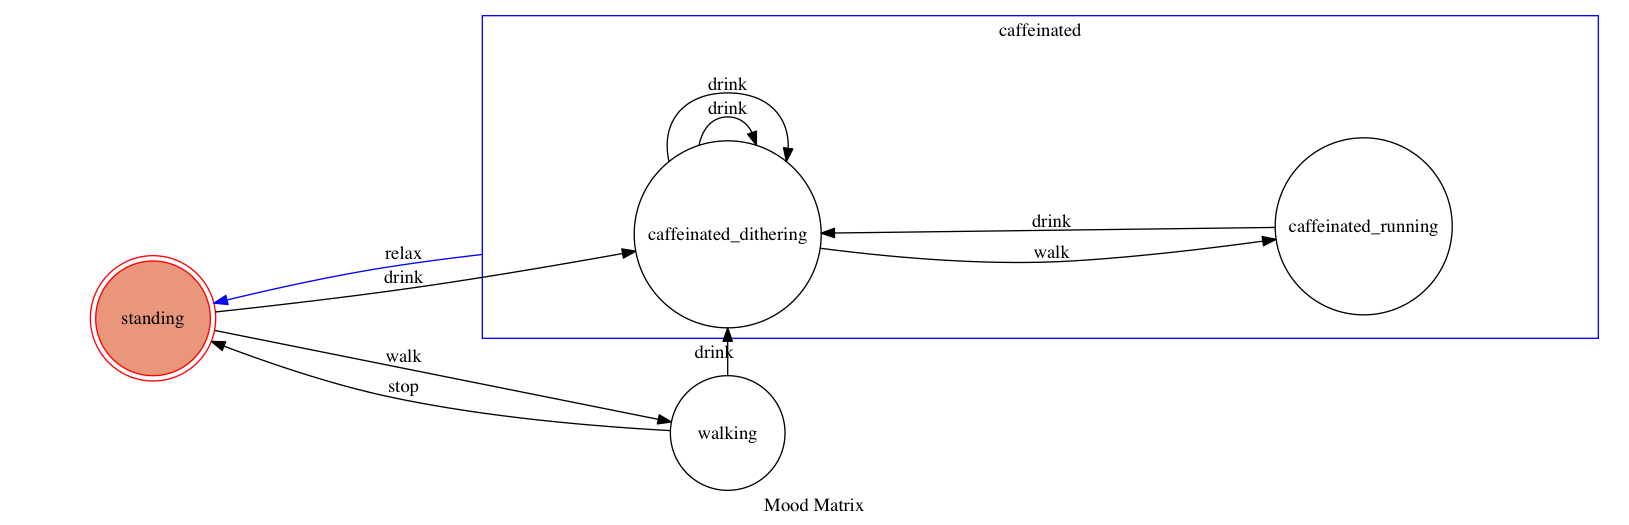

In [8]:
machine.model.relax()
machine.show_graph()